<a href="https://colab.research.google.com/github/reeeerra/Kmeans-Clustering/blob/main/BELAJAR_BANYAKKK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **CLUSTERING**

## **K-MEAN Clustering**

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DATA_SET_PYTHON/stockdata.csv")
df.head()

,MSFT,IBM,SBUX,AAPL,GSPC,Date
0,23.950705,80.517962,16.149666,11.086612,1416.599976,2007-01-03
1,23.910599,81.378851,16.167992,11.332687,1418.339966,2007-01-04
2,23.774242,80.642129,16.099269,11.251984,1409.709961,2007-01-05
3,24.006852,81.867244,16.039710,11.307550,1412.839966,2007-01-08
4,24.030914,82.835742,15.970989,12.246870,1412.109985,2007-01-09


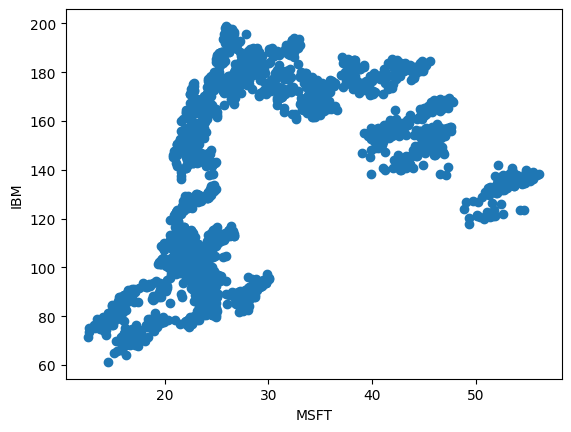

In [ ]:
plt.scatter(df['MSFT'], df['IBM'])
plt.xlabel('MSFT')
plt.ylabel('IBM')
plt.show()  #menampilkan plot

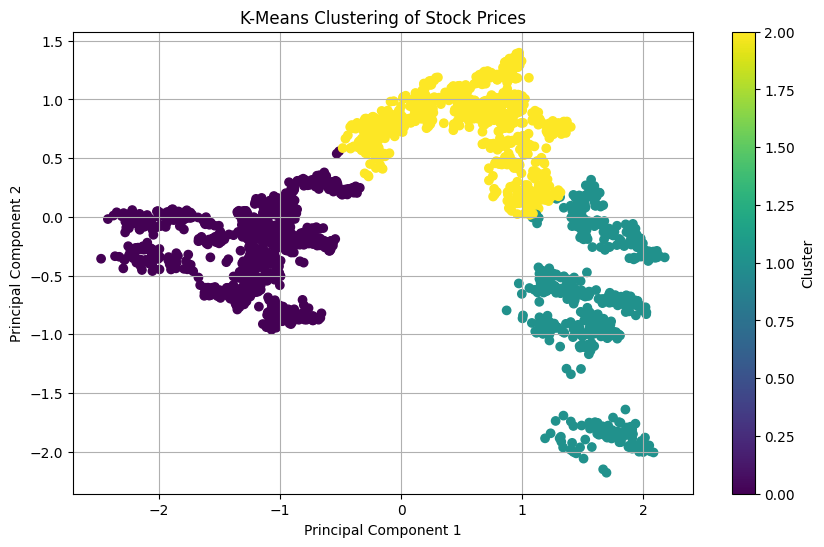

Cluster Centers in original scale:
[[ 98.41212617  22.23516821]
 [158.28682676  44.56764544]
 [171.41331065  27.09035116]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Load the dataset
df = pd.read_csv("/content/drive/MyDrive/DATA_SET_PYTHON/stockdata.csv")

# Step 2: Prepare the data
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime if needed
df.set_index('Date', inplace=True)

# Select only the stock prices for clustering
data = df[['IBM', 'MSFT']].dropna()  # Drop rows with NaN values

# Step 3: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 4: Perform K-Means Clustering
# Choosing the number of clusters (k)
k = 3  # You can choose different values for k
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Step 5: Visualize the clusters using PCA
pca = PCA(n_components=2)  # Reduce dimensions for visualization
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['Cluster'], cmap='viridis', label='Clusters')
plt.title('K-Means Clustering of Stock Prices')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

# Display the cluster centers
print("Cluster Centers in original scale:")
print(scaler.inverse_transform(kmeans.cluster_centers_))


## **Hierarchical Clustering**

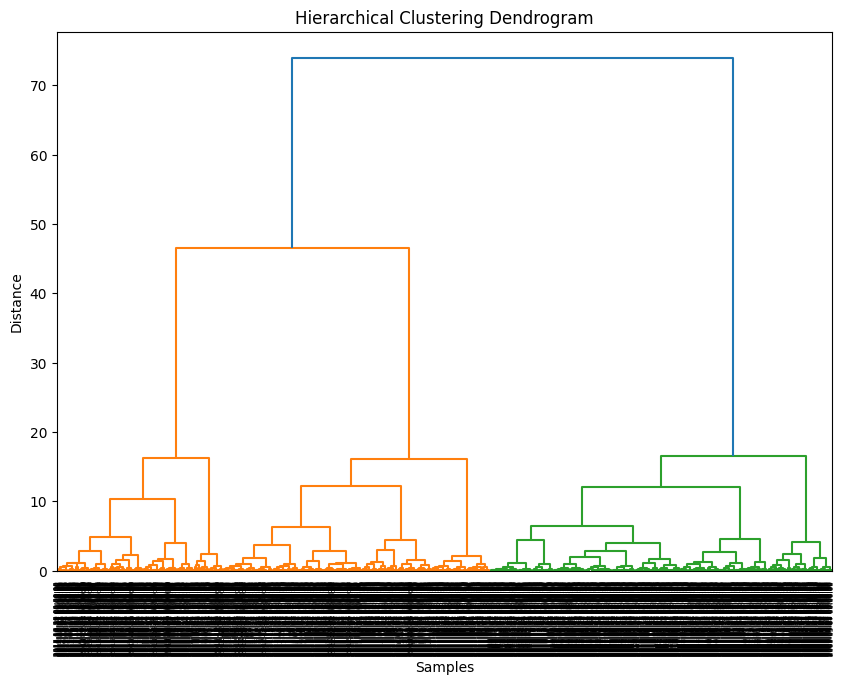

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
df = pd.read_csv("/content/drive/MyDrive/DATA_SET_PYTHON/stockdata.csv")

# Step 2: Prepare the data
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime if needed
df.set_index('Date', inplace=True)

# Select only the stock prices for clustering
data = df[['IBM', 'MSFT']].dropna()  # Drop rows with NaN values

# Step 3: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 4: Perform Hierarchical Clustering
linked = linkage(data_scaled, method='ward')

# Step 5: Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=data.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


## **DBSCAN Clustering**

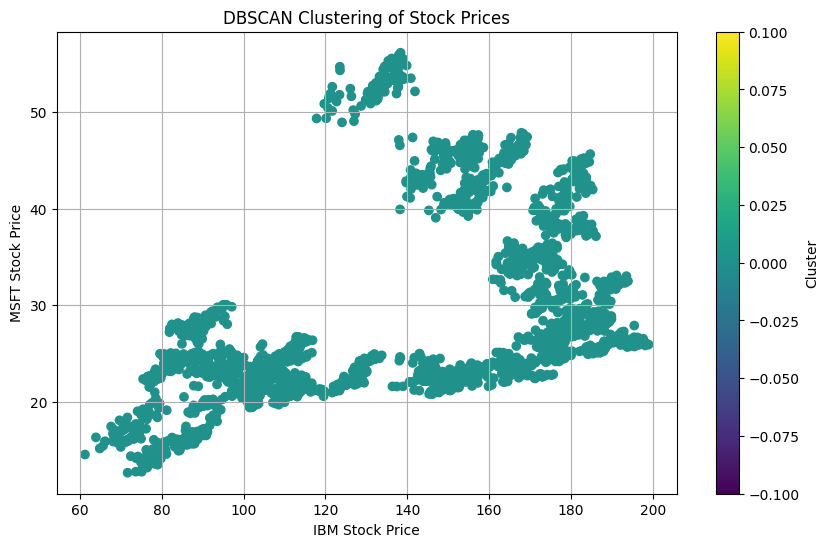

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
df = pd.read_csv("/content/drive/MyDrive/DATA_SET_PYTHON/stockdata.csv")

# Step 2: Prepare the data
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime if needed
df.set_index('Date', inplace=True)

# Select only the stock prices for clustering
data = df[['IBM', 'MSFT']].dropna()  # Drop rows with NaN values

# Step 3: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 4: Perform DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
data['Cluster'] = dbscan.fit_predict(data_scaled)

# Step 5: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['IBM'], data['MSFT'], c=data['Cluster'], cmap='viridis', label='Clusters')
plt.title('DBSCAN Clustering of Stock Prices')
plt.xlabel('IBM Stock Price')
plt.ylabel('MSFT Stock Price')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


# **BELAJAR DATA CLEANING**

In [2]:
import pandas as pd #data structures like DataFrames and Series that make handling and analyzing structured data (like spreadsheets, SQL tables, etc.) easy.
import numpy as np #library for numerical computations in Python. It provides support for arrays, matrices, and a variety of mathematical functions to operate on these data structures.
from functools import reduce # to reduce a list to a single value using some cumulative operation, though it can often be replaced with more explicit alternatives like loops or sum().

## **Dropping unnecessary columns**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DATA_SET_PYTHON/BL-Flickr-Images-Book.csv")
df.head()

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


In [ ]:
to_drop = ['Edition Statement',
           'Corporate Author',
           'Corporate Contributors',
           'Former owner',
           'Engraver',
           'Contributors',
           'Issuance type',
           'Shelfmarks']

df.drop(to_drop, inplace = True, axis = 1) #performs the drop operation in the same dataframe
df.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


## **Droping row**

In [ ]:
df.drop([1,3], axis=0, inplace=True)
df

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
5,481,London,1875,William Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
6,519,London,1872,The Author,Lagonells. By the author of Darmayne (F. E. A....,"A., F. E.",http://www.flickr.com/photos/britishlibrary/ta...
...,...,...,...,...,...,...,...
8282,4158088,London,1838,NaN,"The Parochial History of Cornwall, founded on,...","GIDDY, afterwards GILBERT, Davies.",http://www.flickr.com/photos/britishlibrary/ta...
8283,4158128,Derby,"1831, 32",M. Mozley & Son,The History and Gazetteer of the County of Der...,"GLOVER, Stephen - of Derby",http://www.flickr.com/photos/britishlibrary/ta...
8284,4159563,London,[1806]-22,T. Cadell and W. Davies,Magna Britannia; being a concise topographical...,"LYSONS, Daniel - M.A., F.R.S., and LYSONS (Sam...",http://www.flickr.com/photos/britishlibrary/ta...
8285,4159587,Newcastle upon Tyne,1834,Mackenzie & Dent,"An historical, topographical and descriptive v...","Mackenzie, E. (Eneas)",http://www.flickr.com/photos/britishlibrary/ta...


In [ ]:
df.drop(df.index[2:4], inplace=True)
df

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
6,519,London,1872,The Author,Lagonells. By the author of Darmayne (F. E. A....,"A., F. E.",http://www.flickr.com/photos/britishlibrary/ta...
7,667,"pp. 40. G. Bryan & Co: Oxford, 1898",NaN,NaN,"The Coming of Spring, and other poems. By J. A...","A., J.|A., J.",http://www.flickr.com/photos/britishlibrary/ta...
8,874,London],1676,NaN,"A Warning to the inhabitants of England, and L...",Remaʿ.,http://www.flickr.com/photos/britishlibrary/ta...
...,...,...,...,...,...,...,...
8282,4158088,London,1838,NaN,"The Parochial History of Cornwall, founded on,...","GIDDY, afterwards GILBERT, Davies.",http://www.flickr.com/photos/britishlibrary/ta...
8283,4158128,Derby,"1831, 32",M. Mozley & Son,The History and Gazetteer of the County of Der...,"GLOVER, Stephen - of Derby",http://www.flickr.com/photos/britishlibrary/ta...
8284,4159563,London,[1806]-22,T. Cadell and W. Davies,Magna Britannia; being a concise topographical...,"LYSONS, Daniel - M.A., F.R.S., and LYSONS (Sam...",http://www.flickr.com/photos/britishlibrary/ta...
8285,4159587,Newcastle upon Tyne,1834,Mackenzie & Dent,"An historical, topographical and descriptive v...","Mackenzie, E. (Eneas)",http://www.flickr.com/photos/britishlibrary/ta...


In [ ]:
import pandas as pd

# Load your data into a DataFrame (assuming it was originally a CSV or Excel file)
# df = pd.read_csv('your_file.csv')  # Replace this with the actual file loading code

# Replace 'NaN' with an empty string or another value
df.fillna('', inplace=True)

# Alternatively, you can drop rows or columns containing NaN values
# df.dropna(inplace=True)  # This removes rows with any NaN values

# Save or display the modified DataFrame
df.to_csv('cleaned_file.csv', index=False)  # Save the cleaned data if needed
df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879,S. Tinsley & Co.,Walter Forbes,AA,http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love The Avenger,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
519,London,1872,The Author,Lagonells,F. E A.,http://www.flickr.com/photos/britishlibrary/ta...
667,Oxford,NaN,,"The Coming Of Spring, And Other Poems",J.|A A.,http://www.flickr.com/photos/britishlibrary/ta...
874,London,1676,,"A Warning To The Inhabitants Of England, And L...",Remaʿ,http://www.flickr.com/photos/britishlibrary/ta...


In [ ]:
#df = df.iloc[:30] #In this code, :3 selects the rows until the index 2.
#df

In [ ]:
#df.drop(df[(df['Place of Publication'] == "London") & (df['Publisher'] =="S. Tinsley & Co.")].index, inplace=True)
#df

## **Setting index**

In [ ]:
df.set_index('Identifier', inplace = True)
df.head()
#Ini berarti kolom 'Identifier' dalam DataFrame df dijadikan sebagai index.
#Opsi inplace=True memastikan bahwa perubahan dilakukan langsung pada DataFrame yang sama tanpa membuat salinan baru.
#After setting the index, you can access rows using the index values directly, e.g., df.loc[206].

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
519,London,1872,The Author,Lagonells. By the author of Darmayne (F. E. A....,"A., F. E.",http://www.flickr.com/photos/britishlibrary/ta...
667,"pp. 40. G. Bryan & Co: Oxford, 1898",NaN,NaN,"The Coming of Spring, and other poems. By J. A...","A., J.|A., J.",http://www.flickr.com/photos/britishlibrary/ta...
874,London],1676,NaN,"A Warning to the inhabitants of England, and L...",Remaʿ.,http://www.flickr.com/photos/britishlibrary/ta...


In [ ]:
print(df.index) #cek index

Index([    206,     218,     519,     667,     874,    1143,    1280,    1808,
          1905,    1929,
       ...
       4117751, 4117752, 4156359, 4157746, 4157862, 4158088, 4158128, 4159563,
       4159587, 4160339],
      dtype='int64', name='Identifier', length=8283)


In [ ]:
if '667' in df.index:
    print(df.loc['667'])
else:
    print("'667' not found in index") #Not found krn dia bukan string, gabisa pake "..."

'667' not found in index


In [ ]:
print(df.loc[206])

Place of Publication                                               London
Date of Publication                                           1879 [1878]
Publisher                                                S. Tinsley & Co.
Title                                   Walter Forbes. [A novel.] By A. A
Author                                                              A. A.
Flickr URL              http://www.flickr.com/photos/britishlibrary/ta...
Name: 206, dtype: object


## **contoh kolom Date of Publication**

In [ ]:
df['Date of Publication'].head(25) #dengan index yang ada, menampilkan Date of Publication

,Date of Publication
Identifier,
206,1879 [1878]
218,1869
519,1872
667,NaN
874,1676
1143,1679
1280,1802
1808,1859
1905,1888


## **Cleaning columns using the .apply function**

In [ ]:
unwanted_characters = ['[', ',', '-'] #tidak diinginkan (seperti tanda kurung buka [, koma ,, dan tanda minus -)., Karakter-karakter ini akan dihapus dari nilai di kolom Date of Publication.

def clean_dates(item): #membersihkan nilai di kolom Date of Publication.item adalah baris dari DataFrame yang diteruskan oleh metode apply
    dop= str(item.loc['Date of Publication']) #Kolom Date of Publication dari baris saat ini dikonversi menjadi string. dop menyimpan string tersebut.

    if dop == 'nan' or dop[0] == '[':
        return np.NaN #Jika nilai dop adalah 'nan' (menggunakan string 'nan' untuk memeriksa nilai NaN) atau jika nilai pertama dop adalah '[', maka: Kembalikan NaN untuk menunjukkan nilai yang hilang.

    for character in unwanted_characters:
        if character in dop:
            character_index = dop.find(character)
            dop = dop[:character_index] #apply digunakan untuk menerapkan fungsi clean_dates pada setiap baris di DataFrame

    return dop

df['Date of Publication'] = df.apply(clean_dates, axis = 1) #(axis=1 menunjukkan bahwa kita bekerja pada baris, bukan kolom). Kolom Date of Publication diperbarui dengan nilai yang dibersihkan dari fungsi.

In [ ]:
df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
519,London,1872,The Author,Lagonells. By the author of Darmayne (F. E. A....,"A., F. E.",http://www.flickr.com/photos/britishlibrary/ta...
667,"pp. 40. G. Bryan & Co: Oxford, 1898",NaN,NaN,"The Coming of Spring, and other poems. By J. A...","A., J.|A., J.",http://www.flickr.com/photos/britishlibrary/ta...
874,London],1676,NaN,"A Warning to the inhabitants of England, and L...",Remaʿ.,http://www.flickr.com/photos/britishlibrary/ta...


In [ ]:
#alternate way of cleaning Date of Publication
#run cell to see output
unwanted_characters = ['[', ',', '-']

def clean_dates(dop):
    dop = str(dop)
    if dop.startswith('[') or dop == 'nan':
        return 'NaN'
    for character in unwanted_characters:
        if character in dop:
            character_index = dop.find(character)
            dop = dop[:character_index]
    return dop

df['Date of Publication'] = df['Date of Publication'].apply(clean_dates)
df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
519,London,1872,The Author,Lagonells. By the author of Darmayne (F. E. A....,"A., F. E.",http://www.flickr.com/photos/britishlibrary/ta...
667,"pp. 40. G. Bryan & Co: Oxford, 1898",NaN,NaN,"The Coming of Spring, and other poems. By J. A...","A., J.|A., J.",http://www.flickr.com/photos/britishlibrary/ta...
874,London],1676,NaN,"A Warning to the inhabitants of England, and L...",Remaʿ.,http://www.flickr.com/photos/britishlibrary/ta...


In [ ]:
def clean_author_names(author):

    author = str(author)

    if author == 'nan':
        return 'NaN'

    author = author.split(',')

    if len(author) == 1:
        name = filter(lambda x: x.isalpha(), author[0])
        return reduce(lambda x, y: x + y, name)

    last_name, first_name = author[0], author[1]

    first_name = first_name[:first_name.find('-')] if '-' in first_name else first_name

    if first_name.endswith(('.', '.|')):
        parts = first_name.split('.')

        if len(parts) > 1:
            first_occurence = first_name.find('.')
            final_occurence = first_name.find('.', first_occurence + 1)
            first_name = first_name[:final_occurence]
        else:
            first_name = first_name[:first_name.find('.')]

    last_name = last_name.capitalize()

    return f'{first_name} {last_name}'


df['Author'] = df['Author'].apply(clean_author_names)

In [ ]:
df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,AA,http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
519,London,1872,The Author,Lagonells. By the author of Darmayne (F. E. A....,F. E A.,http://www.flickr.com/photos/britishlibrary/ta...
667,"pp. 40. G. Bryan & Co: Oxford, 1898",NaN,NaN,"The Coming of Spring, and other poems. By J. A...",J.|A A.,http://www.flickr.com/photos/britishlibrary/ta...
874,London],1676,NaN,"A Warning to the inhabitants of England, and L...",Remaʿ,http://www.flickr.com/photos/britishlibrary/ta...


In [ ]:
def clean_title(title):

    if title == 'nan':
        return 'NaN'

    if title[0] == '[':
        title = title[1: title.find(']')]

    if 'by' in title:
        title = title[:title.find('by')]
    elif 'By' in title:
        title = title[:title.find('By')]

    if '[' in title:
        title = title[:title.find('[')]

    title = title[:-2]

    title = list(map(str.capitalize, title.split()))
    return ' '.join(title)

df['Title'] = df['Title'].apply(clean_title)
df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879,S. Tinsley & Co.,Walter Forbes,AA,http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love The Avenger,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
519,London,1872,The Author,Lagonells,F. E A.,http://www.flickr.com/photos/britishlibrary/ta...
667,"pp. 40. G. Bryan & Co: Oxford, 1898",NaN,NaN,"The Coming Of Spring, And Other Poems",J.|A A.,http://www.flickr.com/photos/britishlibrary/ta...
874,London],1676,NaN,"A Warning To The Inhabitants Of England, And L...",Remaʿ,http://www.flickr.com/photos/britishlibrary/ta...


**Using .str methods to clean columns**

In [ ]:
#4157862 and 4159587
df.loc[4159587]

,4159587
Place of Publication,Newcastle upon Tyne
Date of Publication,1834
Publisher,Mackenzie & Dent
Title,"An Historical, Topographical And Descriptive V..."
Author,E. (Eneas) Mackenzie
Flickr URL,http://www.flickr.com/photos/britishlibrary/ta...


In [ ]:
pub = df['Place of Publication']
df['Place of Publication'] = np.where(pub.str.contains('London'), 'London',
    np.where(pub.str.contains('Oxford'), 'Oxford',
        np.where(pub.eq('Newcastle upon Tyne'),
            'Newcastle-upon-Tyne', df['Place of Publication'])))

In [ ]:
df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879,S. Tinsley & Co.,Walter Forbes,AA,http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love The Avenger,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
519,London,1872,The Author,Lagonells,F. E A.,http://www.flickr.com/photos/britishlibrary/ta...
667,Oxford,NaN,NaN,"The Coming Of Spring, And Other Poems",J.|A A.,http://www.flickr.com/photos/britishlibrary/ta...
874,London,1676,NaN,"A Warning To The Inhabitants Of England, And L...",Remaʿ,http://www.flickr.com/photos/britishlibrary/ta...


**Cleaning entire dataset**

In [ ]:
file_path = '/content/drive/MyDrive/DATA_SET_PYTHON/university_towns.txt'

# Membuka file dan membaca seluruh isi file
with open(file_path, 'r') as file:
    data = file.read()

# Menampilkan isi file
print(data)


Alabama[edit]
Auburn (Auburn University)[1]
Florence (University of North Alabama)
Jacksonville (Jacksonville State University)[2]
Livingston (University of West Alabama)[2]
Montevallo (University of Montevallo)[2]
Troy (Troy University)[2]
Tuscaloosa (University of Alabama, Stillman College, Shelton State)[3][4]
Tuskegee (Tuskegee University)[5]
Alaska[edit]
Fairbanks (University of Alaska Fairbanks)[2]
Arizona[edit]
Flagstaff (Northern Arizona University)[6]
Tempe (Arizona State University)
Tucson (University of Arizona)
Arkansas[edit]
Arkadelphia (Henderson State University, Ouachita Baptist University)[2]
Conway (Central Baptist College, Hendrix College, University of Central Arkansas)[2]
Fayetteville (University of Arkansas)[7]
Jonesboro (Arkansas State University)[8]
Magnolia (Southern Arkansas University)[2]
Monticello (University of Arkansas at Monticello)[2]
Russellville (Arkansas Tech University)[2]
Searcy (Harding University)[5]
California[edit]
Angwin (Pacific Union College

In [ ]:
university_towns = []

with open(file_path, 'r') as file:
    items = file.readlines()  # read all lines into a list
    print(f"Total lines in the file: {len(items)}")  # check the total number of lines
    states = list(filter(lambda x: '[edit]' in x, items))
    print(f"Extracted states: {states}")  # check if states are being filtered correctly

    for index, state in enumerate(states):
        start = items.index(state) + 1
        if index == 49:  # assuming 50 states
            end = len(items)
        else:
            end = items.index(states[index + 1])

        pairs = map(lambda x: [state, x], items[start:end])
        university_towns.extend(pairs)

print(f"Number of university-town pairs: {len(university_towns)}")

towns_df = pd.DataFrame(university_towns, columns=['State', 'RegionName'])
print(towns_df.head())


Total lines in the file: 567
Extracted states: ['Alabama[edit]\n', 'Alaska[edit]\n', 'Arizona[edit]\n', 'Arkansas[edit]\n', 'California[edit]\n', 'Colorado[edit]\n', 'Connecticut[edit]\n', 'Delaware[edit]\n', 'Florida[edit]\n', 'Georgia[edit]\n', 'Hawaii[edit]\n', 'Idaho[edit]\n', 'Illinois[edit]\n', 'Indiana[edit]\n', 'Iowa[edit]\n', 'Kansas[edit]\n', 'Kentucky[edit]\n', 'Louisiana[edit]\n', 'Maine[edit]\n', 'Maryland[edit]\n', 'Massachusetts[edit]\n', 'Michigan[edit]\n', 'Minnesota[edit]\n', 'Mississippi[edit]\n', 'Missouri[edit]\n', 'Montana[edit]\n', 'Nebraska[edit]\n', 'Nevada[edit]\n', 'New Hampshire[edit]\n', 'New Jersey[edit]\n', 'New Mexico[edit]\n', 'New York[edit]\n', 'North Carolina[edit]\n', 'North Dakota[edit]\n', 'Ohio[edit]\n', 'Oklahoma[edit]\n', 'Oregon[edit]\n', 'Pennsylvania[edit]\n', 'Rhode Island[edit]\n', 'South Carolina[edit]\n', 'South Dakota[edit]\n', 'Tennessee[edit]\n', 'Texas[edit]\n', 'Utah[edit]\n', 'Vermont[edit]\n', 'Virginia[edit]\n', 'Washington[edit]

In [ ]:
def clean_up(item):
    if '(' in item:
        return item[:item.find('(') - 1]

    if '[' in item:
        return item[:item.find('[')]


towns_df =  towns_df.applymap(clean_up)
towns_df.head()

<ipython-input-27-465df075d104>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  towns_df =  towns_df.applymap(clean_up)


,State,RegionName
0,Alabama,Auburn
1,Alabama,Florence
2,Alabama,Jacksonville
3,Alabama,Livingston
4,Alabama,Montevallo


**Renaming columns and skipping rows**

In [ ]:
olympics_df = pd.read_csv('/content/drive/MyDrive/DATA_SET_PYTHON/olympics.csv')
olympics_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,? Summer,01 !,02 !,03 !,Total,? Winter,01 !,02 !,03 !,Total,? Games,01 !,02 !,03 !,Combined total
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12


In [ ]:
olympics_df = pd.read_csv('/content/drive/MyDrive/DATA_SET_PYTHON/olympics.csv', skiprows = 1, header = 0)
olympics_df.head()

,Unnamed: 0,? Summer,01 !,02 !,03 !,Total,? Winter,01 !.1,02 !.1,03 !.1,Total.1,? Games,01 !.2,02 !.2,03 !.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [ ]:
new_names =  {'Unnamed: 0': 'Country',
              '? Summer': 'Summer Olympics',
              '01 !': 'Gold',
              '02 !': 'Silver',
              '03 !': 'Bronze',
              '? Winter': 'Winter Olympics',
              '01 !.1': 'Gold.1',
              '02 !.1': 'Silver.1',
              '03 !.1': 'Bronze.1',
              '? Games': '# Games',
              '01 !.2': 'Gold.2',
              '02 !.2': 'Silver.2',
              '03 !.2': 'Bronze.2'}

olympics_df.rename(columns = new_names, inplace = True)

In [ ]:
olympics_df.head()

,Country,Summer Olympics,Gold,Silver,Bronze,Total,Winter Olympics,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


# **STATMODELS**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DATA_SET_PYTHON/stockdata.csv")
df.head()

,MSFT,IBM,SBUX,AAPL,GSPC,Date
0,23.950705,80.517962,16.149666,11.086612,1416.599976,2007-01-03
1,23.910599,81.378851,16.167992,11.332687,1418.339966,2007-01-04
2,23.774242,80.642129,16.099269,11.251984,1409.709961,2007-01-05
3,24.006852,81.867244,16.039710,11.307550,1412.839966,2007-01-08
4,24.030914,82.835742,15.970989,12.246870,1412.109985,2007-01-09


In [ ]:
df.tail()

,MSFT,IBM,SBUX,AAPL,GSPC,Date
2301,51.360001,132.800003,58.110001,96.099998,1929.800049,2016-02-24
2302,52.099998,134.500000,58.750000,96.760002,1951.699951,2016-02-25
2303,51.299999,132.029999,58.340000,96.910004,1948.050049,2016-02-26
2304,50.880001,131.029999,58.209999,96.690002,1932.229980,2016-02-29
2305,52.580002,134.369995,60.040001,100.529999,1978.349976,2016-03-01


## **Simple linear regression (OLS - Ordinary Least Squares)**

In [ ]:
X = df['IBM']  # Independent variable
y = df['MSFT']  # Dependent variable (predict MSFT)

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y, X).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     697.3
Date:                Tue, 22 Oct 2024   Prob (F-statistic):          1.78e-134
Time:                        07:23:34   Log-Likelihood:                -8151.3
No. Observations:                2306   AIC:                         1.631e+04
Df Residuals:                    2304   BIC:                         1.632e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0960      0.653     18.510      0.0

## **Ridge Regression (L2 Regularization)**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Fit Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust alpha for stronger regularization
ridge_model.fit(X, y)

# Get the slope and intercept
print("Ridge Model slope     = ", ridge_model.coef_[0])
print("Ridge Model intercept = ", ridge_model.intercept_)

# Calculate the R-squared value
print("R**2                  = ", ridge_model.score(X, y))


Ridge Model slope     =  0.0
Ridge Model intercept =  12.096032306517014
R**2                  =  0.23234129293650174


## **Lasso Regression (L1 Regularization)**

In [ ]:
from sklearn.linear_model import Lasso

# Fit Lasso Regression
lasso_model = Lasso(alpha=1.0)  # Adjust alpha for regularization strength
lasso_model.fit(X, y)

# Get the slope and intercept
print("Lasso Model slope     = ", lasso_model.coef_[0])
print("Lasso Model intercept = ", lasso_model.intercept_)

# Calculate the R-squared value
print("R**2                  = ", lasso_model.score(X, y))


Lasso Model slope     =  0.0
Lasso Model intercept =  12.193592966426916
R**2                  =  0.2323333070438488


## **Elastic Net Regression (Combination of L1 and L2 Regularization)**

In [ ]:
from sklearn.linear_model import ElasticNet

# Fit Elastic Net Regression
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # l1_ratio balances L1 and L2
elastic_net_model.fit(X, y)

# Get the slope and intercept
print("Elastic Net Model slope     = ", elastic_net_model.coef_[0])
print("Elastic Net Model intercept = ", elastic_net_model.intercept_)

# Calculate the R-squared value
print("R**2                        = ", elastic_net_model.score(X, y))


Elastic Net Model slope     =  0.0
Elastic Net Model intercept =  12.150749323674177
R**2                        =  0.23233878073274639


## **Support Vector Regression (SVR)**

In [ ]:
from sklearn.svm import SVR

# Fit Support Vector Regression
svr_model = SVR(kernel='linear')
svr_model.fit(X, y)

# Predict values
y_pred = svr_model.predict(X)

# Calculate the R-squared value
print("SVR R**2                  = ", r2_score(y, y_pred))


SVR R**2                  =  0.14287361656698172


## **Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Fit Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X, y)

# Predict values
y_pred = tree_model.predict(X)

# Calculate the R-squared value
print("Decision Tree R**2         = ", r2_score(y, y_pred))


Decision Tree R**2         =  0.9995970618766327


# **FORECASTING**

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

Mean Squared Error: 72.64226054895663


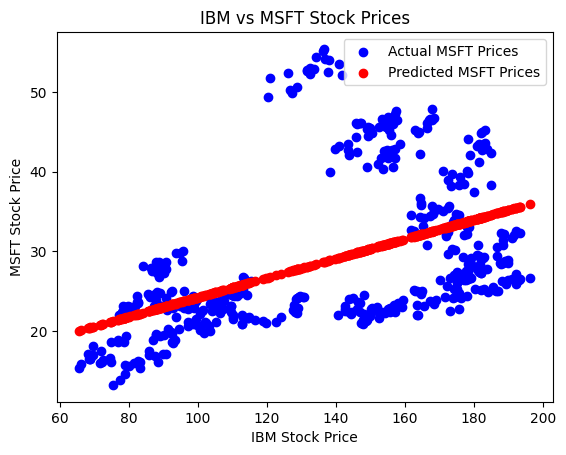

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Load the dataset
df = pd.read_csv("/content/drive/MyDrive/DATA_SET_PYTHON/stockdata.csv")

# Step 2: Prepare the data
X = df[['IBM']]  # Independent variable (reshaped to 2D array)
y = df['MSFT']   # Dependent variable

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Step 7: Visualize the results
plt.scatter(X_test, y_test, color='blue', label='Actual MSFT Prices')
plt.scatter(X_test, y_pred, color='red', label='Predicted MSFT Prices')
plt.title('IBM vs MSFT Stock Prices')
plt.xlabel('IBM Stock Price')
plt.ylabel('MSFT Stock Price')
plt.legend()
plt.show()


## **ARIMA**

ADF Statistic: 0.5077879482397027
p-value: 0.985107892372696
Critial Values:
	1%: -3.43320007524933
Critial Values:
	5%: -2.8627990992000947
Critial Values:
	10%: -2.567440275533058


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

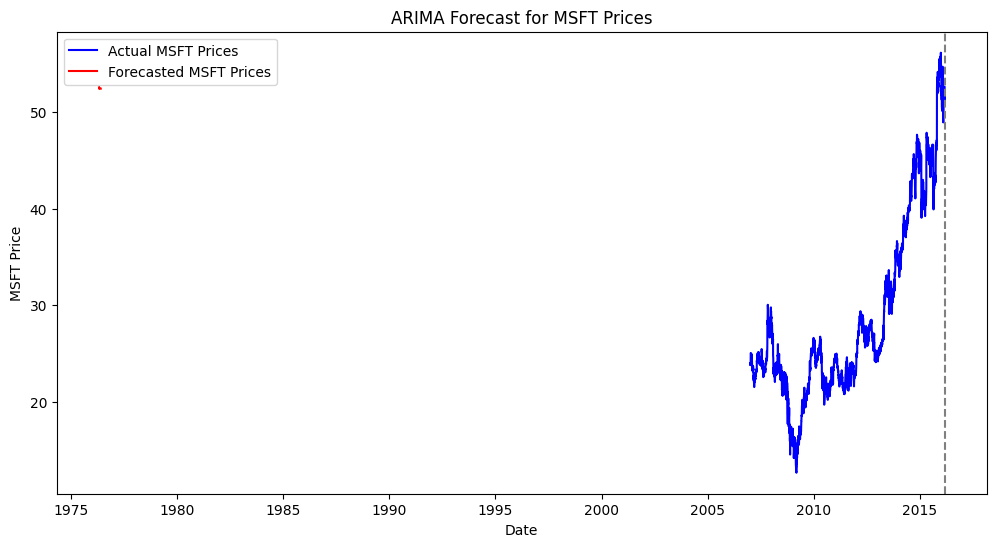

                               SARIMAX Results                                
Dep. Variable:                   MSFT   No. Observations:                 2306
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1667.283
Date:                Tue, 22 Oct 2024   AIC                           3346.567
Time:                        07:23:49   BIC                           3381.024
Sample:                             0   HQIC                          3359.128
                               - 2306                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0055      0.014     -0.389      0.697      -0.033       0.022
ar.L2         -0.0377      0.015     -2.446      0.014      -0.068      -0.007
ar.L3          0.0145      0.016      0.916      0.3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

# Step 1: Load the dataset
df = pd.read_csv("/content/drive/MyDrive/DATA_SET_PYTHON/stockdata.csv")

# Step 2: Prepare the data
# Assuming the dataset has a 'Date' column and stock prices are in 'MSFT'
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
df.set_index('Date', inplace=True)  # Set date as index
df = df[['MSFT']]  # Focus on MSFT prices

# Step 3: Check for stationarity
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'\t{key}: {value}')

test_stationarity(df['MSFT'])

# If the series is not stationary, take the first difference
df['MSFT_diff'] = df['MSFT'].diff().dropna()

# Step 4: Fit the ARIMA model
model = ARIMA(df['MSFT'], order=(5, 1, 0))  # (p, d, q) - tune the parameters as needed
model_fit = model.fit()

# Step 5: Make predictions
forecast = model_fit.forecast(steps=30)  # Forecast for the next 30 days

# Step 6: Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(df['MSFT'], label='Actual MSFT Prices', color='blue')
plt.plot(forecast, label='Forecasted MSFT Prices', color='red')
plt.title('ARIMA Forecast for MSFT Prices')
plt.xlabel('Date')
plt.ylabel('MSFT Price')
plt.axvline(x=df.index[-1], color='gray', linestyle='--')  # Vertical line to separate train and forecast
plt.legend()
plt.show()

# Optionally, print the model summary
print(model_fit.summary())


## **Random Forest Regressor**

Mean Squared Error: 65.04895928621535


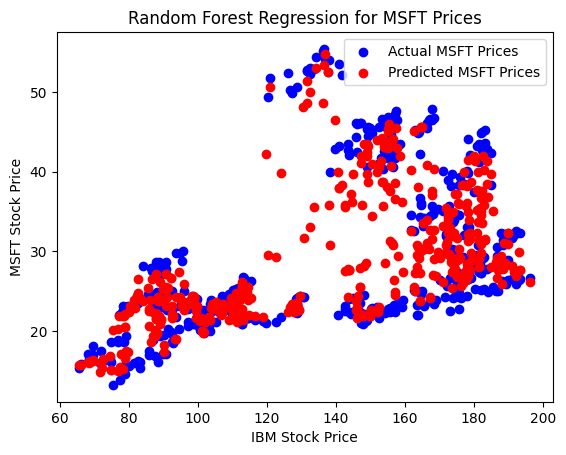

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 1: Load the dataset
df = pd.read_csv("/content/drive/MyDrive/DATA_SET_PYTHON/stockdata.csv")

# Step 2: Prepare the data
X = df[['IBM']]  # Independent variable
y = df['MSFT']   # Dependent variable

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Step 7: Visualize the results
plt.scatter(X_test, y_test, color='blue', label='Actual MSFT Prices')
plt.scatter(X_test, y_pred, color='red', label='Predicted MSFT Prices')
plt.title('Random Forest Regression for MSFT Prices')
plt.xlabel('IBM Stock Price')
plt.ylabel('MSFT Stock Price')
plt.legend()
plt.show()

# Optionally, print the model summary
print(model_fit.summary())


# **NAIVE BAYES**

Accuracy: 48.59%
              precision    recall  f1-score   support

         0.0       0.53      0.27      0.35       245
         1.0       0.47      0.74      0.57       216

    accuracy                           0.49       461
   macro avg       0.50      0.50      0.46       461
weighted avg       0.50      0.49      0.46       461



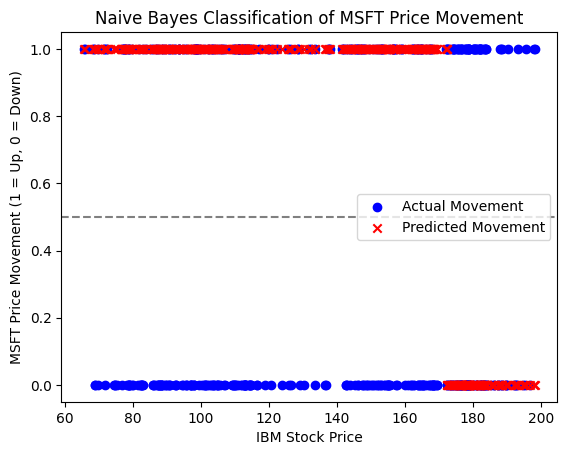

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the dataset
df = pd.read_csv("/content/drive/MyDrive/DATA_SET_PYTHON/stockdata.csv")

# Step 2: Prepare the data
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime if needed
df.set_index('Date', inplace=True)

# Step 3: Create features and labels
# Create a column to indicate if the price went up or down
df['MSFT_Movement'] = np.where(df['MSFT'].shift(-1) > df['MSFT'], 1, 0)  # 1 if the price goes up, else 0

# Use IBM's stock price as a feature
X = df[['IBM']]  # Independent variable

# Align y with X after dropping NaN
y = df['MSFT_Movement'].shift(-1).dropna()  # Shift y to match the size of X
X = X[:-1]  # Remove last row since we have shifted

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))

# Optional: Visualize the results
plt.scatter(X_test, y_test, color='blue', label='Actual Movement')
plt.scatter(X_test, y_pred, color='red', marker='x', label='Predicted Movement')
plt.title('Naive Bayes Classification of MSFT Price Movement')
plt.xlabel('IBM Stock Price')
plt.ylabel('MSFT Price Movement (1 = Up, 0 = Down)')
plt.axhline(0.5, color='gray', linestyle='--')
plt.legend()
plt.show()

## **Gaussian Mixture Models (GMM)**

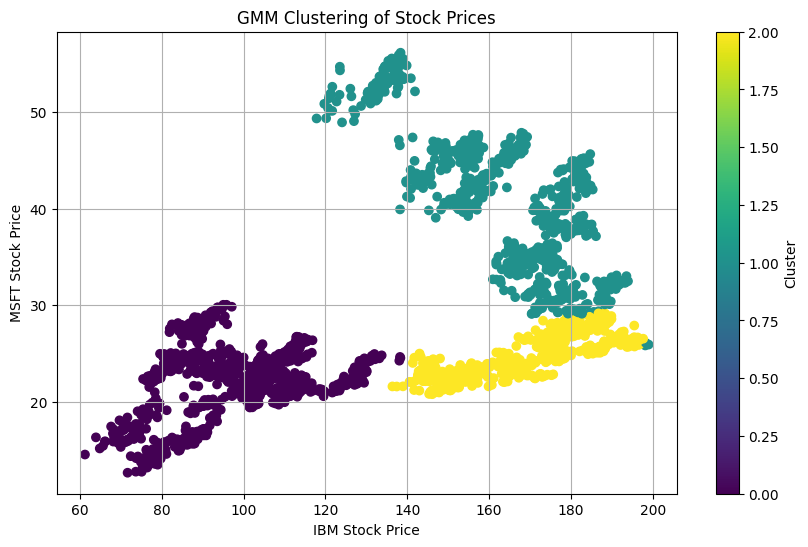

Means of the clusters:
[[ 98.52875737  22.24638254]
 [164.69946966  40.28028786]
 [168.5710393   24.84461392]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
df = pd.read_csv("/content/drive/MyDrive/DATA_SET_PYTHON/stockdata.csv")

# Step 2: Prepare the data
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime if needed
df.set_index('Date', inplace=True)

# Select only the stock prices for clustering
data = df[['IBM', 'MSFT']].dropna()  # Drop rows with NaN values

# Step 3: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 4: Perform GMM Clustering
n_components = 3  # Number of clusters; you can adjust this
gmm = GaussianMixture(n_components=n_components, random_state=42)
data['Cluster'] = gmm.fit_predict(data_scaled)

# Step 5: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['IBM'], data['MSFT'], c=data['Cluster'], cmap='viridis', label='Clusters')
plt.title('GMM Clustering of Stock Prices')
plt.xlabel('IBM Stock Price')
plt.ylabel('MSFT Stock Price')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

# Optional: Display the means of the clusters
print("Means of the clusters:")
print(scaler.inverse_transform(gmm.means_))
